# MACHINE LEARNING PROJECT

# Project Name: Diamond Price Prediction Using Machine Learning

# Project by- Namrata Milind Vakare

# Abstract
Diamonds are one of the most powerful, precious and treasured naturally occurring materials that form from pre-historic carbon. Nevertheless, as opposed to gold and silver, diamond pricing is very complicated as there are many features to consider when determining the price. The aim of this project remains to put forth a more optimal solution for the purpose of diamond price projection. This involves training a distinct machine learning model on the available diamond dataset to predict diamond prices established by considering several attributes using algorithms such as linear regression, decision trees, and K-nearest neighbours. In addition, a correlative survey of different machine learning regression models is executed for the purpose of diamond price prediction.

In [1]:
#importing libraries that are essential for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# loading the dataset
data=pd.read_csv("diamonds2.csv")
data

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


# What are the columns x,y,z?
In the context of a diamond dataset, the columns labeled 'x', 'y', and 'z' typically represent the dimensions of the diamonds:

x: Length of the diamond in millimeters.
y: Width of the diamond in millimeters.
z: Depth of the diamond in millimeters.
These dimensions are essential in determining the physical size and shape of the diamond. The combination of these three measurements, along with other factors like carat, cut, color, and clarity, contributes to the overall assessment of a diamond's quality and value.

In [3]:
# Displays default first 5 rows.
data.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [4]:
# gives the description of main statistical measures.
data.describe()

,price,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [5]:
#This part calculates the sum of True values for each column, effectively counting the number of missing values in each column. 
data.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [6]:
# provides the information about information about the DataFrame's structure, data types, and memory usage. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
#This line is used to remove or drop specific columns from the DataFrame.
data=data.drop(['depth','table','x','y','z'],axis=1)

# Reason for dropping columns from the data
Irrelevance: These certain columns do not contribute significantly to the prediction task or analysis, they have to be dropped to simplify the model and improve computational efficiency. For example, the 'table' column does not have a strong impact on predicting diamond prices compared to other features.

Focusing on Important Features:  On the basis of goals of the analysis, we want to focus on the most important features that have a substantial impact on the target variable. This can enhance the model's interpretability and generalization.


In [8]:
#This line is used to check whether the columns are properly removed or not.
data.head(2)

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1


In [9]:
# States the type of data present for each and every column.
data.dtypes

price        int64
carat      float64
cut         object
color       object
clarity     object
dtype: object

In [10]:
#Here we have converted the datatype of price column from integer to float because it consists of decimal values.
data["price"]=data.price.astype(float)
data.dtypes

price      float64
carat      float64
cut         object
color       object
clarity     object
dtype: object

# Data Visualization

# histogram
Distribution of Diamond Carat Weight:

The distribution of carat weight is right-skewed, with a higher frequency of smaller carat weights. This is expected, as larger diamonds are rarer and, therefore, more valuable.
Diamond Price Distribution:

The distribution of diamond prices is also right-skewed, indicating that there are more diamonds with lower prices. This aligns with the typical pricing structure of diamonds.

Text(0.5, 1.0, 'Diamond Price Distribution')

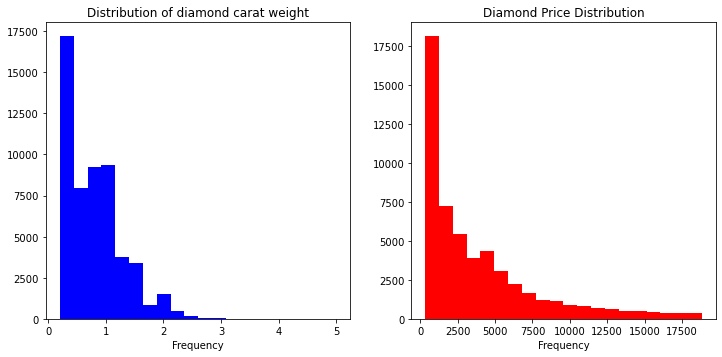

In [11]:
#In this step we will set the figsize and decide how much bins we want and in which colour,we are also giving heading for x axis, y axis and giving the title for the whole graph.
plt.figure(figsize=[12,12])
plt.subplot(221)
#carat weight distribution
plt.hist(data['carat'],bins=20,color='blue')
plt.xlabel("Carat Weight")
plt.xlabel("Frequency")
plt.title("Distribution of diamond carat weight")
plt.subplot(222)
#distribution of price value
plt.hist(data['price'],bins=20,color='red')
plt.xlabel("Diamond Price")
plt.xlabel("Frequency")
plt.title("Diamond Price Distribution")


# pie chart
Distribution of Diamond Colors:

The pie chart shows the distribution of diamond colors. The majority of diamonds seem to fall into specific color categories. Understanding the distribution of colors is important for evaluating the overall diversity in the dataset.

Text(0.5, 1.0, 'Distribution of Diamond Colors')

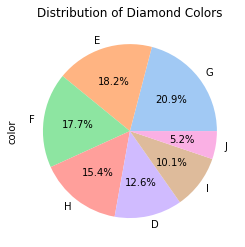

In [12]:
plt.subplot
colors = sns.color_palette('pastel')[0:len(data['color'].unique())]
data['color'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.title("Distribution of Diamond Colors")

# heatmap
Correlation Heatmap:

The heatmap illustrates the correlation between different numerical features in the dataset. For example, there may be a positive correlation between carat weight and diamond price, as larger diamonds tend to be more expensive.

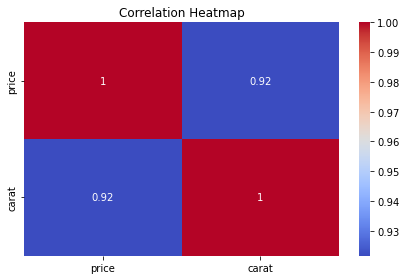

In [13]:
plt.subplot
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

# Adjusting the layout for better visualization
plt.tight_layout()

# scatter plot
Scatter Plot of Carat Weight vs. Diamond Price:

The scatter plot shows a positive correlation between carat weight and diamond price, which is consistent with expectations. Larger diamonds generally have higher prices.

Text(0.5, 1.0, 'Scatter Plot of Carat Weight vs Diamond Price')

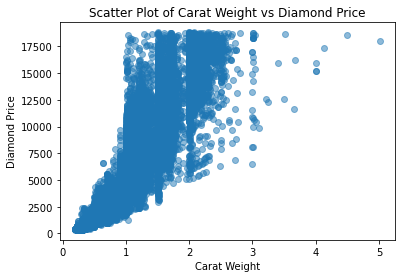

In [14]:
plt.subplot
plt.scatter(data['carat'], data['price'], alpha=0.5)
plt.xlabel('Carat Weight')
plt.ylabel('Diamond Price')
plt.title('Scatter Plot of Carat Weight vs Diamond Price')

# boxplot
Box Plot of Diamond Price by Cut:

The box plot provides insights into how diamond prices vary based on the cut. It appears that certain cuts, such as 'Premium' and 'Very Good,' have a wider range of prices compared to others. Understanding these variations is crucial for assessing the impact of cut on diamond prices.

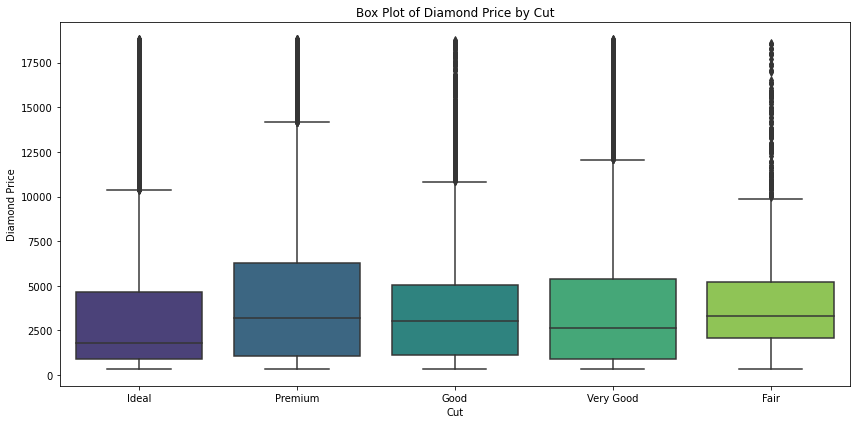

In [15]:
plt.figure(figsize=[12, 6])
sns.boxplot(x='cut', y='price', data=data, palette='viridis')
plt.title('Box Plot of Diamond Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Diamond Price')

plt.tight_layout()
plt.show()

# Conclusions based on the visualizations
Conclusions:

Carat weight is positively correlated with diamond price.

The dataset contains diamonds with a variety of colors, with certain colors being more prevalent than others.

The distribution of diamond prices and carat weights aligns with expectations.
The cut of a diamond seems to influence its price, with some cuts showing a wider range of prices than others.

These visualizations provide valuable insights into the dataset and can guide further analysis. 


# Label Encoder converting categorical data into numeric form

In [16]:
#Here, we have used LabelEncoder class, is created and assigned to the variable l1. This step will be used to perform label encoding.The fit_transform method of the LabelEncoder class is applied to the 'cut' column of the DataFrame data. This method fits the encoder to the unique values in the 'cut' column and then transforms those values into numerical labels. 
from sklearn.preprocessing import LabelEncoder
l1= LabelEncoder()
label=l1.fit_transform(data['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [17]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [18]:
#We have made use of data['cut_label'] = label is assigning the encoded labels obtained from the LabelEncoder to a new column named 'cut_label' in the DataFrame data.
data['cut_label']=label

In [19]:
data.head(2)

,price,carat,cut,color,clarity,cut_label
0,326.0,0.23,Ideal,E,SI2,2
1,326.0,0.21,Premium,E,SI1,3


In [20]:
#LabelEncoder class is created and assigned to the variable l2.The fit_transform method of the LabelEncoder class is applied to the 'clarity' column of the DataFrame data. This method fits the encoder to the unique values in the 'clarity' column and then transforms those values into numerical labels. 
l2=LabelEncoder()
label1=l2.fit_transform(data['clarity'])
data['clarity_label']=label1
data.head(2)

,price,carat,cut,color,clarity,cut_label,clarity_label
0,326.0,0.23,Ideal,E,SI2,2,3
1,326.0,0.21,Premium,E,SI1,3,2


In [21]:
#The map function is applied to the 'color' column, and it replaces each value in the column based on the mapping specified in the dictionary. For example, 'D' is replaced with 1, 'E' is replaced with 2, and so on. The 'NA' is replaced with 8.
data['color']=data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8}) #.astype(int)

In [22]:
# The fillna method is applied to the 'color' column. This method is used to fill missing (NaN) values with the specified value, in this case, 0.
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [23]:
#The code data['color'].isnull().sum() is checking the number of missing (NaN) values in the 'color' column of the DataFrame data.
data['color'].isnull().sum()

0

In [24]:
data.head(2)

,price,carat,cut,color,clarity,cut_label,clarity_label
0,326.0,0.23,Ideal,2,SI2,2,3
1,326.0,0.21,Premium,2,SI1,3,2


# Creating dependent and independent variable

In [25]:
y=data['price']
y.head(1)

0    326.0
Name: price, dtype: float64

In [26]:
#in this step we are creating a new DataFrame x by dropping the specified columns 
x=data.drop(['price','cut','clarity'],axis=1)
x.head(1)

,carat,color,cut_label,clarity_label
0,0.23,2,2,3


# Training Dataset

In [27]:
#The train_test_split is a function that is commonly used to split a dataset into training and testing sets for machine learning.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [28]:
# here this step gives you the number of samples (rows) in your training set. 
len(x_train)

43152

In [29]:
len(y_test)

10788

In [30]:
len(data)

53940

In [31]:
data.head()

,price,carat,cut,color,clarity,cut_label,clarity_label
0,326.0,0.23,Ideal,2,SI2,2,3
1,326.0,0.21,Premium,2,SI1,3,2
2,327.0,0.23,Good,2,VS1,1,4
3,334.0,0.29,Premium,6,VS2,3,5
4,335.0,0.31,Good,7,SI2,1,3


In [32]:
#it shows the default last 5 rows of the dataset. 
data.tail()

,price,carat,cut,color,clarity,cut_label,clarity_label
53935,2757.0,0.72,Ideal,1,SI1,2,2
53936,2757.0,0.72,Good,1,SI1,1,2
53937,2757.0,0.70,Very Good,1,SI1,4,2
53938,2757.0,0.86,Premium,5,SI2,3,3
53939,2757.0,0.75,Ideal,1,SI2,2,3


# Standard Scaler Method
Reason of using standard scaling

1.Standard scaling ensures that all features are on a comparable scale. When features are measured in different units or have different ranges, some features may dominate the learning process simply due to their larger numerical values. Scaling prevents this issue and allows each feature to contribute more equally to the model training.

2.Regularization techniques, such as L1 and L2 regularization, are sensitive to the scale of the features. Standard scaling ensures that regularization is applied fairly to all features, preventing certain features from being unfairly penalized or favored based on their scale.

3.Algorithms that rely on distances between data points, such as k-nearest neighbors (KNN) or support vector machines (SVM), can be sensitive to the scale of features. Standard scaling helps maintain the integrity of distance metrics.


In [33]:
#An instance of the StandardScaler class is created. This instance will be used to scale (standardize) the features.The fit_transform method of the StandardScaler class is applied to the training set (x_train). This method computes the mean and standard deviation necessary for standardization and then transforms the features in the training set using these computed values.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Linear Regression Algorithm

In [34]:
#The LinearRegression class is created and assigned to the variable linreg. This instance will be used to build the linear regression model.
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
pred=linreg.predict(x_test)

# Accuracy score of Linear Regression


In [35]:
#This step is used to check the accuracy.
from sklearn.metrics import r2_score
lr=r2_score(y_test,pred)*100
print(lr)

87.76517206528275


# Decision Tree Regressor algorithm

In [36]:
# here the DecisionTreeRegressor class is created and assigned to the variable reg. 
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1=reg.predict(x_test)

# Accuracy score of Decision Tree regressor model

In [37]:
# This step is used to check the accuracy score.
from sklearn.metrics import r2_score
dtr=r2_score(y_test,pred1)*100
print(dtr)

97.14135122401221


# Random Forest Regressor Algorithm

In [38]:
#the RandomForestRegressor, creating an instance of 50 (n_estimators=50), fits the model to the training data, and then predicts the target variable on the testing set , storing the predictions in the variable pred2. 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

# Accuracy score of Random Forest Regressor Model

In [39]:
# This step is used to check the accuracy score.
from sklearn.metrics import r2_score
rfr=r2_score(y_test,pred2)*100
print(rfr)

97.77277074405882


# Lasso regression algorithm

In [40]:
#the Lasso regression model, creates an instance (lassoreg = Lasso()), fits the model to the training data (lassoreg.fit(x_train, y_train)), and then predicts the target variable on the testing set (pred4 = lassoreg.predict(x_test)), storing the predictions in the variable pred4.
from sklearn.linear_model import Lasso
lassoreg=Lasso()
lassoreg.fit(x_train,y_train)
pred4=lassoreg.predict(x_test)

# Accuracy Score of Lasso Algorithm

In [41]:
#This step is used to check the accuracy score.
lasso=r2_score(y_test,pred4)*100
print(lasso)

87.76523078289839


# Ridge regression algorithm

In [42]:
#The code uses the Ridge regression model, creates an instance (ridreg = Ridge()), fits the model to the training data (ridreg.fit(x_train, y_train)), and then predicts the target variable on the testing set (pred4 = ridreg.predict(x_test)), storing the predictions in the variable pred4.
from sklearn.linear_model import Ridge
ridreg=Ridge()
ridreg.fit(x_train,y_train)
pred4=ridreg.predict(x_test)

# Accuracy Score of Ridge Algorithm

In [43]:
from sklearn.metrics import r2_score
rid=r2_score(y_test,pred4)*100
print(rid)

87.76517737916106


# SVR algorithm

In [44]:
#the Support Vector Machine for Regression (SVR), creates an instance (svr = SVR()), fits the model to the training data (svr.fit(x_train, y_train)), and then predicts the target variable on the testing set (pred5 = svr.predict(x_test)), storing the predictions in the variable pred5. 
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred5=svr.predict(x_test)

In [45]:
svrscore=r2_score(y_test,pred5)*100
print(svrscore)

48.377356598766276


# Overall accuracy Score

In [46]:
#This step is used to check which model gives us the best accuracy.
print("LinearRegression",lr)
print("DecisionTree",dtr)
print("RandomForestClassifier",rfr)
print("Ridge Linear model",rid)
print("Lasso Linear model",lasso)
print("SupportVectorRegressor",svrscore)


LinearRegression 87.76517206528275
DecisionTree 97.14135122401221
RandomForestClassifier 97.77277074405882
Ridge Linear model 87.76517737916106
Lasso Linear model 87.76523078289839
SupportVectorRegressor 48.377356598766276


# Conclusion

So here we apply all Regression Algorithm one by one on available data, we can conclude that we get better accuracy in Random Forest Classifier algorithm. Its 97.75%, when we apply Random Forest Classifier algorithm on model for prediction we get better prediction as compare to other algorithm.We did apply scaling method on data,because when we use scaling data for algorithm that time we are getting high accuracy as compared to normal data.

# Prediction Part

In [47]:
#The step shown below defines a function prediction that takes user input for the features carat, cut, clarity, and color. It then uses a RandomForestRegressor (rf) to predict the diamond price based on the provided feature values. Finally, the predicted price is printed. The function is called with predi = prediction()
def prediction():
    carat=(input("Enter the value of carat:"))
    cut=(input("Enter the value of cut:"))
    clarity=(input("Enter the value of clarity:"))
    color=(input("Enter the value of color:"))
    
    
    price=rf.predict([[carat,cut,clarity,color]])
    
    print("Approximately Price of Diamond is:",price,'Rs')
    
    
predi=prediction()

predi

Enter the value of carat:0.23
Enter the value of cut:3
Enter the value of clarity:2
Enter the value of color:3
Approximately Price of Diamond is: [3706.49333333] Rs
